## Cleaning Procedure of FartDB
- salt stripping
- SMILES of canonical tautomers

- stereo: either remove stereo completely or mark in additional column to exclude for split
- acids: TODO

In [2]:
import rdkit
from rdkit import Chem
from rdkit.Chem import rdmolops
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.Chem import SaltRemover
import pandas as pd
from rdkit import RDLogger
import swifter

RDLogger.DisableLog('rdApp.info')

/Users/henrikseng/miniforge3/envs/fart/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
fart0 = pd.read_csv("../fart_curated.csv")
len(fart0)

15031

In [6]:
### Identigy rows with contradictory taste labels
df_not = fart0[fart0["Original Labels"].apply(lambda x: "not" in x.lower() or "contra" in x.lower())]

print("Number of contradictory labels:", len(df_not))
# print(df_not["Original Labels"].values)
df_not[["Canonicalized SMILES", "Canonicalized Taste", "Original Labels"]].to_dict()

Number of contradictory labels: 28


{'Canonicalized SMILES': {12635: 'CCCCCC(C=CC=CCCCCCCCC(=O)O)OO',
  12760: 'COc1cc(CC2C(=O)OCC2Cc2ccc(OC)c(OC)c2)ccc1O',
  12838: 'O=C(O)C=Cc1ccc(O)c(O)c1',
  12839: 'O=C(O)C=Cc1ccc(O)c(O)c1',
  12985: 'O=Cc1cccc2c1CCOC2=O',
  12993: 'COC1CC(OC2C(C)OC(OC3C(C)OC(OC4CCC5(C)C(=CCC6C5CCC5(C)C6CC(OC6OC(COC7OC(CO)C(O)C(O)C7O)C(O)C(O)C6O)C5C(C)=O)C4)C(O)C3OC)CC2OC)OC(C)C1OC(=O)C=C(C)C',
  12994: 'COC1CC(OC2C(C)OC(OC3C(C)OC(OC4CCC5(C)C(=CCC6C5CCC5(C)C6CC(OC6OC(COC7OC(CO)C(O)C(O)C7O)C(O)C(O)C6O)C5C(C)=O)C4)C(O)C3OC)CC2OC)OC(C)C1OC(=O)C=C(C)C',
  12995: 'COC1CC(OC2C(C)OC(OC3C(C)OC(OC4CCC5(C)C(=CCC6C5CCC5(C)C6CC(OC6OC(COC7OC(CO)C(O)C(O)C7OC7OC(CO)C(O)C(O)C7O)C(O)C(O)C6O)C5C(C)=O)C4)C(O)C3OC)CC2OC)OC(C)C1OC(=O)C=C(C)C',
  12996: 'COC1CC(OC2C(C)OC(OC3C(C)OC(OC4CCC5(C)C(=CCC6C5CCC5(C)C6CC(OC6OC(COC7OC(CO)C(O)C(O)C7OC7OC(CO)C(O)C(O)C7O)C(O)C(O)C6O)C5C(C)=O)C4)C(O)C3OC)CC2OC)OC(C)C1OC(=O)C=C(C)C',
  13009: 'COc1cc2ccc(=O)oc2c(O)c1O',
  13010: 'COc1cc2ccc(=O)oc2c(O)c1O',
  13066: 'CC=C(C)C(=O)OC1C(O)C2

In [ ]:
### Manually inspected these 4 entries and decided to remove them from the dataset
'''
{
    'Canonicalized SMILES': {
        12458: 'C=C1CCC2C(C)(COC3OC(CO)C(O)C(O)C3O)CCCC2(C)C1CCC1=CCOC1=O',
        14677: 'COC1CC(OC2C(C)OC(OC3C(C)OC(OC4CCC5(C)C(=CCC6C5CCC5(C)C6CC(OC6OC(COC7OC(CO)C(O)C(O)C7O)C(O)C(O)C6O)C5C(C)=O)C4)C(O)C3OC)CC2OC)OC(C)C1OC(=O)C=C(C)C',
        14679: 'COC1CC(OC2C(C)OC(OC3C(C)OC(OC4CCC5(C)C(=CCC6C5CCC5(C)C6CC(OC6OC(COC7OC(CO)C(O)C(O)C7OC7OC(CO)C(O)C(O)C7O)C(O)C(O)C6O)C5C(C)=O)C4)C(O)C3OC)CC2OC)OC(C)C1OC(=O)C=C(C)C',
        14861: 'O=C(O)c1ccc(O)cc1'
    },
    'Standardized SMILES': {
        12458: 'C=C1CCC2C(C)(COC3OC(CO)C(O)C(O)C3O)CCCC2(C)C1CCC1=CCOC1=O',
        14677: 'COC1CC(OC2C(C)OC(OC3C(C)OC(OC4CCC5(C)C(=CCC6C5CCC5(C)C6CC(OC6OC(COC7OC(CO)C(O)C(O)C7O)C(O)C(O)C6O)C5C(C)=O)C4)C(O)C3OC)CC2OC)OC(C)C1OC(=O)C=C(C)C',
        14679: 'COC1CC(OC2C(C)OC(OC3C(C)OC(OC4CCC5(C)C(=CCC6C5CCC5(C)C6CC(OC6OC(COC7OC(CO)C(O)C(O)C7OC7OC(CO)C(O)C(O)C7O)C(O)C(O)C6O)C5C(C)=O)C4)C(O)C3OC)CC2OC)OC(C)C1OC(=O)C=C(C)C',
        14861: 'O=C(O)c1ccc(O)cc1'
    },
    'Canonicalized Taste': {
        12458: 'bitter',
        14677: 'bitter',
        14679: 'bitter',
        14861: 'bitter'
    },
}
'''
indexes_to_remove = [12458, 14677, 14679, 14861]

# remove the matching rows to df_remove
fart01 = fart0[~fart0.index.isin(indexes_to_remove)]

In [ ]:
### Refined standardization function

x = rdMolStandardize.CleanupParameters()
x.maxTransforms = 100000
x.maxTautomers = 10000

salt_remover = SaltRemover.SaltRemover()
uncharger = rdMolStandardize.Uncharger(canonicalOrder=True)

def standardize(smiles):
    mol = Chem.MolFromSmiles(smiles)
    
    ### Salt stripping
    mol = salt_remover.StripMol(mol, dontRemoveEverything=True)

    ### Zwitterion
    mol = uncharger.uncharge(mol)

    ### Tauromers
    rdMolStandardize.CanonicalTautomer(mol, x)

    ### Stereo
    ssmiles = Chem.MolToSmiles(mol, isomericSmiles=False)
    return rdMolStandardize.StandardizeSmiles(ssmiles)

In [11]:
fart01["Standardized SMILES"] = fart01["Standardized SMILES"].swifter.apply(standardize)

Pandas Apply:  10%|█         | 1543/15027 [01:29<2:14:43,  1.67it/s][15:46:08] Can't kekulize mol.  Unkekulized atoms: 4 8
[15:46:12] Tautomer enumeration stopped at 10000 tautomers: max tautomers reached
Pandas Apply:  12%|█▏        | 1838/15027 [02:00<03:00, 73.27it/s]  [15:46:43] Tautomer enumeration stopped at 10000 tautomers: max tautomers reached
[15:46:50] Tautomer enumeration stopped at 10000 tautomers: max tautomers reached
Pandas Apply:  30%|███       | 4574/15027 [03:06<02:22, 73.22it/s]  [15:47:45] WARNING: not removing hydrogen atom without neighbors
[15:47:45] WARNING: not removing hydrogen atom without neighbors
Pandas Apply:  37%|███▋      | 5513/15027 [03:47<02:42, 58.71it/s] [15:48:36] Tautomer enumeration stopped at 10000 tautomers: max tautomers reached
[15:48:44] Tautomer enumeration stopped at 10000 tautomers: max tautomers reached
Pandas Apply:  57%|█████▋    | 8632/15027 [12:37<01:18, 81.96it/s]  [15:57:16] WARNING: not removing hydrogen atom without neighbors
[

In [12]:
### Canonicalize SMILES:
fart01["Canonicalized SMILES"] = fart01["Standardized SMILES"].apply(lambda smi: Chem.MolToSmiles(Chem.MolFromSmiles(smi), isomericSmiles=False))

### Aggregate: remove duplicates with same (Standardized SMILES, taste)
fart_cleaned = fart01.drop_duplicates(subset=["Standardized SMILES", "Canonicalized Taste"])

# update multi column: for each Standardized SMILES find if multiple tastes exist, then label all multi_taste = 1
fart_cleaned["multi_taste"] = 0
taste_counts = fart_cleaned.groupby("Standardized SMILES")["Canonicalized Taste"].nunique()
multi_taste_smiles = taste_counts[taste_counts > 1].index.tolist()
fart_cleaned.loc[fart_cleaned["Standardized SMILES"].isin(multi_taste_smiles), "multi_taste"] = 1


[16:38:15] WARNING: not removing hydrogen atom without neighbors
[16:38:16] WARNING: not removing hydrogen atom without neighbors
[16:38:16] WARNING: not removing hydrogen atom without neighbors
[16:38:16] WARNING: not removing hydrogen atom without neighbors
[16:38:16] WARNING: not removing hydrogen atom without neighbors
/var/folders/kn/0hf77hn5683_d9m7q9qcb5yw0000gq/T/ipykernel_1918/3031263058.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fart01["Canonicalized SMILES"] = fart01["Standardized SMILES"].apply(lambda smi: Chem.MolToSmiles(Chem.MolFromSmiles(smi), isomericSmiles=False))
/var/folders/kn/0hf77hn5683_d9m7q9qcb5yw0000gq/T/ipykernel_1918/3031263058.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [15]:
fart_cleaned.to_csv("fart_cleaned.csv", index=False)

In [21]:
fart_cleaned = pd.read_csv("fart_cleaned.csv", index_col=0)

## Clean Test Set

In [6]:
### Clean test set

test = pd.read_csv("fart_test.csv")
test.reset_index(drop=True, inplace=True)
n0_test = len(test)

In [19]:
test_cleaned = test.copy()

# Remove rows whose Canonicalized SMILES are in the removal list
remove_smiles = set(fart0[fart0.index.isin(indexes_to_remove)]["Canonicalized SMILES"].values)
test_cleaned = test_cleaned[~test_cleaned["Canonicalized SMILES"].isin(remove_smiles)]
print(f"Removed {n0_test -len(test_cleaned)} rows")

# Standardize
test_cleaned["Standardized SMILES"] = test_cleaned["Standardized SMILES"].swifter.apply(standardize)

Removed 2 rows


Pandas Apply: 100%|██████████| 2252/2252 [04:19<00:00,  8.69it/s]


In [22]:
# Re-canonicalize SMILES
test_cleaned["Canonicalized SMILES"] = test_cleaned["Standardized SMILES"].apply(lambda smi: Chem.MolToSmiles(Chem.MolFromSmiles(smi), isomericSmiles=False))

# Remove duplicates with same (Standardized SMILES, taste)
test_cleaned = test_cleaned.drop_duplicates(subset=["Standardized SMILES", "Canonicalized Taste"])
print(f"Removed {n0_test -len(test_cleaned)} rows")

# Remove rows that are in fart_cleaned and have multi_taste = 1
multi_taste_smiles_in_cleaned = set(fart_cleaned[fart_cleaned["multi_taste"] == 1]["Standardized SMILES"].values)
test_cleaned = test_cleaned[~test_cleaned["Standardized SMILES"].isin(multi_taste_smiles_in_cleaned)]
print(f"Removed {n0_test -len(test_cleaned)} rows")

# Remove rows which are NOT in fart_cleaned
valid_smiles = set(fart_cleaned["Standardized SMILES"].values)
test_cleaned = test_cleaned[test_cleaned["Standardized SMILES"].isin(valid_smiles)]
print(f"Removed {n0_test -len(test_cleaned)} rows")

Removed 7 rows
Removed 15 rows
Removed 15 rows


In [23]:
print("Testset size original: ", n0_test)
print("Testset size cleaned: ", len(test_cleaned))
print("Testset size reduction: ", (n0_test-len(test_cleaned))/n0_test*100, "%")

test_cleaned.to_csv("test_cleaned.csv", index=False)

Testset size original:  2254
Testset size cleaned:  2239
Testset size reduction:  0.6654835847382431 %


## How does the Burns et al cleaned dataset look like?

#### Setup

In [3]:
import matplotlib.pyplot as plt

import rdkit
from rdkit import Chem
from rdkit.Chem import rdmolops
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.Chem import SaltRemover
from rdkit.Chem import rdMolDescriptors
import pandas as pd
from rdkit import RDLogger

RDLogger.DisableLog('rdApp.info')

#### How many sour compounds are removed?

In [4]:
fart_c = pd.read_csv("fart_cleaned.csv")

n_sour = len(fart_c[fart_c["Canonicalized Taste"] == "sour"])
n_iupac = len(fart_c[fart_c["Source"] == "IUPAC Dissocation Constants"])
print("Number of sour entries:", n_sour)
print("Number of IUPAC entries:", n_iupac)
print("Percentage of sour compounds removed without IUPAC: ", (n_iupac)/n_sour)

Number of sour entries: 1566
Number of IUPAC entries: 1474
Percentage of sour compounds removed without IUPAC:  0.9412515964240102


#### How does the dataset look like?

In [5]:
df = pd.read_csv("fart_cleaned.csv")
fart_cleaned = df.copy()
print(len(df))

### Remove all IUPAC Dissocation Constants entries
df = df[df["Source"] != "IUPAC Dissocation Constants"]
print("Dataset size after removing IUPAC entries: ", len(df))
### Remove all multi-taste entries
df = df[df["multi_taste"] == 0]
print("Dataset size after removing multi-taste entries: ", len(df))

14891
Dataset size after removing IUPAC entries:  13417
Dataset size after removing multi-taste entries:  12592


In [6]:
### Data imbalance
sour = df[df['Canonicalized Taste'] == 'sour']
bitter = df[df['Canonicalized Taste'] == 'bitter']
sweet = df[df['Canonicalized Taste'] == 'sweet']
umami = df[df['Canonicalized Taste'] == 'umami']
undefined = df[df['Canonicalized Taste'] == 'undefined']
print('sour: ', len(sour))
print('bitter: ', len(bitter))
print('sweet: ', len(sweet))
print('umami: ', len(umami))
print('undefined: ', len(undefined))
print('total: ', len(df))

sour:  34
bitter:  1399
sweet:  9205
umami:  40
undefined:  1914
total:  12592


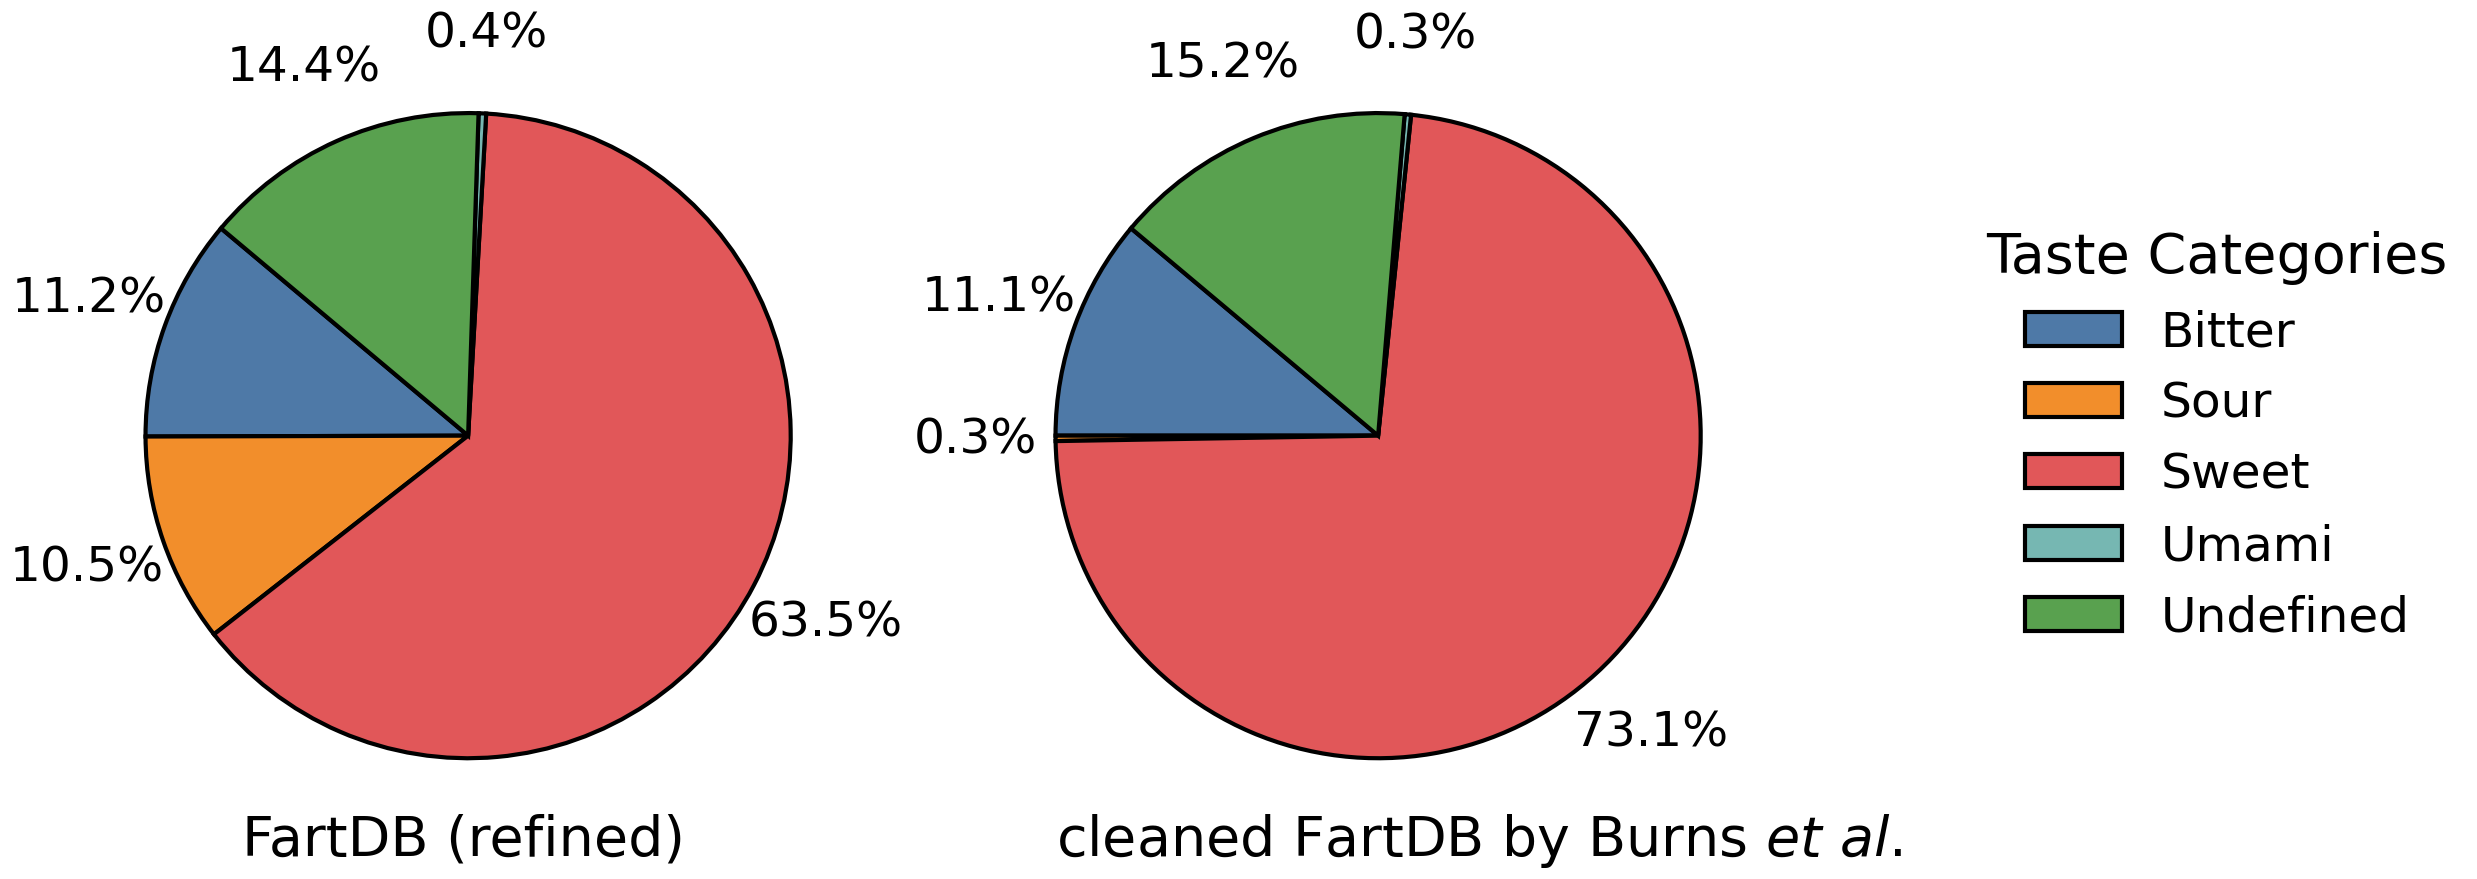

In [13]:
### Visualizing the taste distibution of fart_cleaned (left) and df (right) as pie charts

taste_frequencies = df.groupby('Canonicalized Taste').size().to_dict()
fart_taste_frequencies = fart_cleaned.groupby('Canonicalized Taste').size().to_dict()

# Normalize keys to match the taste_frequencies keys
taste_categories = {
    'Bitter': taste_frequencies.get('bitter', 0),
    'Sour': taste_frequencies.get('sour', 0),
    'Sweet': taste_frequencies.get('sweet', 0),
    'Umami': taste_frequencies.get('umami', 0),
    'Undefined': taste_frequencies.get('undefined', 0),
}

fart_taste_categories = {
    'Bitter': fart_taste_frequencies.get('bitter', 0),
    'Sour': fart_taste_frequencies.get('sour', 0),
    'Sweet': fart_taste_frequencies.get('sweet', 0),
    'Umami': fart_taste_frequencies.get('umami', 0),
    'Undefined': fart_taste_frequencies.get('undefined', 0),
}

colors = ['#4E79A7', '#F28E2B', '#E15759', '#76B7B2', '#59A14F']  # Subdued palette

# Plotting the multi figure pie chart

### Left pie chart: fart_cleaned
multifig, axes = plt.subplots(1, 2, figsize=(25, 20))
plt.sca(axes[0])
wedges, texts, autotexts = plt.pie(
    fart_taste_categories.values(),
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    pctdistance=1.25,       # Position the percentage outside the slices
    labeldistance=1.3,      # Position the labels outside the slices
    textprops={'fontsize': 50},
    wedgeprops={'edgecolor': 'black', 'linewidth':3}
)
for autotext in autotexts:
    autotext.set_fontsize(35)
    autotext.set_color('black')
plt.text(-0.7, -1.3, "FartDB (refined)", fontsize=40)

### Right pie chart: df
plt.sca(axes[1])
wedges, texts, autotexts = plt.pie(
    taste_categories.values(),
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    pctdistance=1.25,       # Position the percentage outside the slices
    labeldistance=1.3,      # Position the labels outside the slices
    textprops={'fontsize': 50},
    wedgeprops={'edgecolor': 'black', 'linewidth':3}
)
for autotext in autotexts:
    autotext.set_fontsize(35)
    autotext.set_color('black')
plt.text(-1, -1.3,r"cleaned FartDB by Burns $\it{et~al.}$", fontsize=40)


# Adding a legend
plt.legend(
    wedges,
    taste_categories.keys(),
    title="Taste Categories",
    title_fontsize=40,  # Setting the legend title font size
    loc="center left",
    bbox_to_anchor=(1.2, 0, 0.5, 1),  # Moving the legend farther to the right
    fontsize=35, 
    frameon=False
)

plt.tight_layout()
plt.savefig("proportion_of_data_sources-with-percentages.png", format='png')
plt.show()